# Guía 8 - Ejercicio 5.1
En este ejercicio se deben separar ciertos campos de la tarjeta, para ello se hace uso del hecho de que estos campos están en negrita, por lo tanto, tiene un grosor mayor, pudiendo así sobrevivir a más erosiones. Por lo tanto, se aplican múltiples erosiones y se reconstruye la imagen resultante. Luego, para obtener las componentes de la imagen restantes se hace la diferencia de la imagen original con la imagen reconstruída.

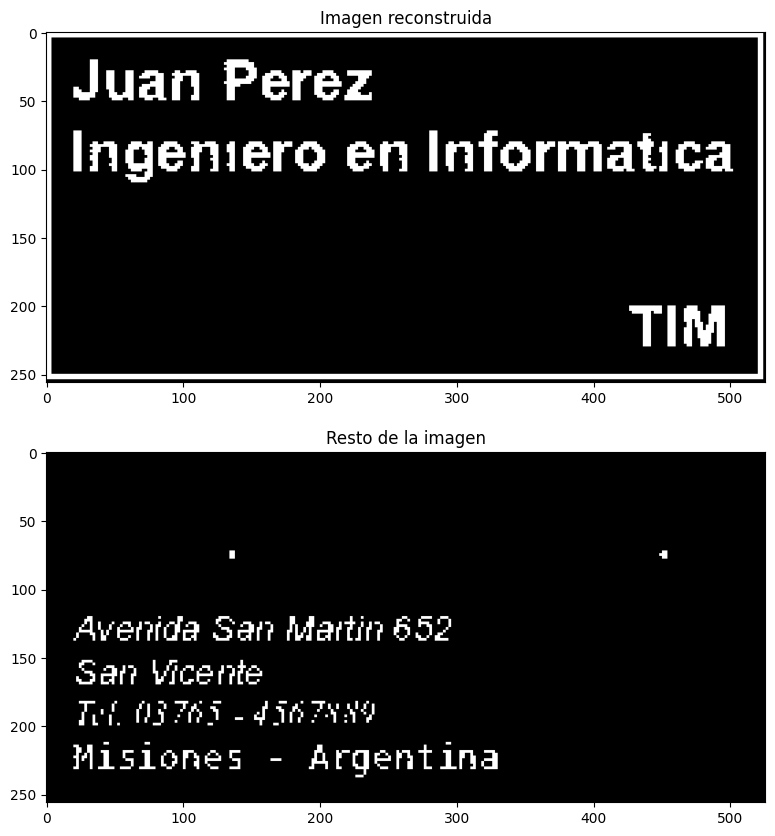

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology

imagen = cv.imread("Imagenes/Tarjeta.jpeg")
imagen_gris = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY)

_,imagen_bin = cv.threshold(imagen_gris, 127, 255, cv.THRESH_BINARY)
imagen_bin = imagen_bin - 255
imagen_bin = cv.resize(imagen_bin, (imagen_bin.shape[1]*2,imagen_bin.shape[0]*2))

kernel = np.array([
    [0, 0, 0],
    [1, 1, 1],
    [0, 0, 0]
], dtype=np.uint8)
kernel2 = np.array([
    [0, 1, 0],
    [0, 1, 0],
    [0, 1, 0]
], dtype=np.uint8)
kernel3 = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
], dtype=np.uint8)
kernel4 = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
], dtype=np.uint8)

result = cv.erode(imagen_bin, kernel, iterations=1)
result = cv.erode(result, kernel2, iterations=1)
result = cv.erode(result, kernel3, iterations=1)

semilla = result.copy()
mascara = imagen_bin.copy()
reconstruido = morphology.reconstruction(semilla,mascara,method='dilation')

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

axs[0].imshow(reconstruido, cmap='gray')
axs[0].set_title('Imagen reconstruida')

resto = imagen_bin - reconstruido
axs[1].imshow(resto, cmap='gray')
axs[1].set_title('Resto de la imagen')

plt.show()
